In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
 
import sklearn
from sklearn import metrics
from sklearn.datasets import make_regression
#from sklearn import preprocessing, cross_validation, neighbors
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv2D, MaxPooling2D
from keras.regularizers import l2

In [46]:
 
def proc1(img): 
  image = Image.open(img)
  newsize = (523,523)
  newimage = image.resize(newsize)
  newimage.save('before.jpg')
  imagea = np.array(newimage)
 
  plt.imshow(newimage)
  mosaic = np.zeros((imagea.shape), dtype = np.uint8)
 
 
 
 
  for i in range(len(imagea)):
      for j in range(len(imagea[0])):
          if(i%2==0):
              if(j%2 ==0):
                  mosaic[i][j][0] = imagea[i][j][0]
              else:
                  mosaic[i][j][1] = imagea[i][j][1]
          else:
              if(j%2 ==0):
                  mosaic[i][j][1] = imagea[i][j][1]
              else:
                  mosaic[i][j][2] = imagea[i][j][2]
 
              
  #demosaic = Image.fromarray(mosaic)
  #plt.imshow(demosaic)
  features = []
  targets =[]
  #black = [0,0,0]
  block=[]
  #it = 0
  for i in range(6, len(imagea)-5):
      for j in range(6, len(imagea[0])-5):
        #it+=1
        
        for k in range(-3,4):
            #print(k)
            """"
            if((i-2<0)or (j-2+k<0)or(i+3>=len(imagea))or(j-2+k>=len(imagea[0]))):
            np.concatenate((block,black))
            else:
                #print(imagea[i-2:i+3][j-2+k])
            """
            
            block =np.concatenate((block,mosaic[j+k][i-3:i+4].flatten()))
        
        features.append(block)
        targets.append(imagea[j][i])
        block =[]
      #print(it)
      #print(it)
        
  return((features,targets))

In [3]:
def proc(img): 
  image = Image.open(img)
  newsize = (523,523)
  newimage = image.resize(newsize)
  #newimage.show()
  imagea = np.array(newimage)
 
  plt.imshow(newimage)
  mosaic = np.zeros((imagea.shape), dtype = np.uint8)
 
 
 
 
  for i in range(len(imagea)):
      for j in range(len(imagea[0])):
          if(i%2==0):
              if(j%2 ==0):
                  mosaic[i][j][0] = imagea[i][j][0]
              else:
                  mosaic[i][j][1] = imagea[i][j][1]
          else:
              if(j%2 ==0):
                  mosaic[i][j][1] = imagea[i][j][1]
              else:
                  mosaic[i][j][2] = imagea[i][j][2]
 
              
  #demosaic = Image.fromarray(mosaic)
  #plt.imshow(demosaic)
  features = []
  targets =[]
  #black = [0,0,0]
  block=[]
  #it = 0
  for i in range(6, len(imagea)-5):
      for j in range(6, len(imagea[0])-5):
        #it+=1
        if(np.random.randint(100)<20):
          for k in range(-3,4):
              #print(k)
              """"
              if((i-2<0)or (j-2+k<0)or(i+3>=len(imagea))or(j-2+k>=len(imagea[0]))):
                np.concatenate((block,black))
              else:
                  #print(imagea[i-2:i+3][j-2+k])
              """
              
              block =np.concatenate((block,mosaic[j+k][i-3:i+4].flatten()))
        
          features.append(block)
          targets.append(imagea[j][i])
          block =[]
      #print(it)
      #print(it)
        
  return((features,targets))

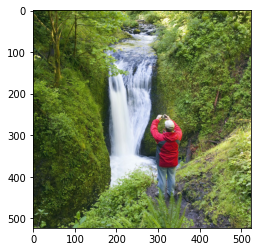

In [4]:
a = proc('/content/drive/MyDrive/Colab/cat0.jpg')

In [5]:
targets = a[1]
features = a[0]
print(len(features[0]))

147


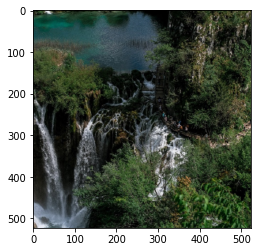

In [6]:

b = proc('/content/drive/MyDrive/Colab/cat'+str(129)+'.jpg')
  
 
for j in range(len(b[0])):
  features.append(b[0][j])
  targets.append(b[1][j])



for i in range(126):
  b = proc('/content/drive/MyDrive/Colab/cat'+str(i+1)+'.jpg')
  
 
  for j in range(len(b[0])):
    features.append(b[0][j])
    targets.append(b[1][j])


126
127


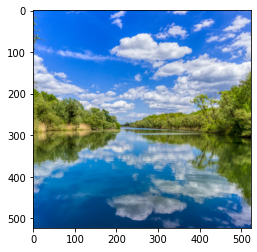

In [7]:


a = proc('/content/drive/MyDrive/Colab/cat0.jpg')
x_test = a[0]
y_test = a[1]
for i in range(126, 128):
  print(i)
  b = proc('/content/drive/MyDrive/Colab/cat'+str(i+1)+'.jpg')
  for j in range(len(b[0])):
    x_test.append(b[0][j])
    y_test.append(b[1][j])
 
  


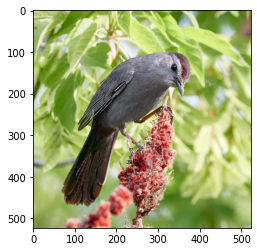

In [47]:
aa = proc1('/content/drive/MyDrive/Colab/cat127.jpg')

In [9]:
features, targets = np.array(features), np.array(targets)
sc = StandardScaler()
features = sc.fit_transform(features)
 

In [10]:
# get the model
model = Sequential()
model.add(Dense(65, input_dim=len(features[0]), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
 
#model.add(Conv2D(filters=2,kernel_size=(2,2),activation='relu',input_shape=(9, 9, 3)))
#model.add(MaxPooling2D(2,2))
#model.add(Dense(25, activation='relu'))
#model.add(Dense(15, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#model.add(Dropout(0.1))
#model.add(Dense(25, activation='relu', kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1)))
#model.add(Dense(15, activation='relu', kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1)))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

#model.add(Dense(15, activation='relu', kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1)))
#model.add(Dense(5, activation='relu'))
model.add(Dense(len(targets[0])))
 
model.compile( optimizer='adam', metrics='accuracy',loss = "mean_squared_error")
 

 
 
#features=np.asarray(features).astype('float32')

In [11]:
print(features.shape)
print(targets.shape)

(6714687, 147)
(6714687, 3)


In [12]:
new = model.fit(features,targets, batch_size=250, epochs=1,shuffle = True)

26859/26859 [==============================] - 62s 2ms/step - loss: 414.8492 - accuracy: 0.8655


In [13]:
x_test, y_test = np.array(x_test), np.array(y_test)
 
x_test = sc.fit_transform(x_test)

In [14]:
model.evaluate(x_test, y_test)

4910/4910 [==============================] - 8s 2ms/step - loss: 109.2253 - accuracy: 0.6487


[109.22530364990234, 0.6487312316894531]

In [41]:
#aa = proc1('/content/drive/MyDrive/Colab/fini.jpg')
f = aa[0]
t = aa[1]

f = sc.fit_transform(f)

demo = model.predict(f)
demo = demo.tolist()
demo.append((0,0,0))
demo = np.array(demo)



for i in range(len(demo)):
    for j in range(len(demo[0])):
        if(demo[i][j]>255):
            demo[i][j] = 255
        if(demo[i][j]<0):
            demo[i][j] = 0
llst = []
for i in range(512):
    
        
    llst.append(demo[262144-(i+1)*512:262144-512*(i)])
    #print(len(demo[i*512:512*(i+1)][0]))


In [42]:
print(len(aa[0]))

262144


In [43]:
llst = np.array(llst)

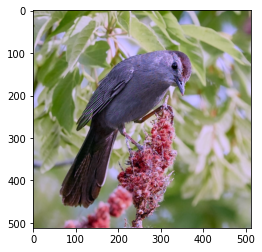

In [44]:
final = Image.fromarray(llst.astype(np.uint8))

plt.imshow(final.rotate(270))


In [45]:
final.rotate(270).save('mushafter.jpg')

In [49]:
model.save('/content/drive/MyDrive/Colab/finalmodel')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab/finalmodel/assets
